## Problem Description :

Our dataset consists of many Features :
- Airline Name
- Date of flight
- Station of departure
- Station of Destination
- Route : all the intermediate stations to pass by 
- Deoarture Time
- Arrival Time
- Duration of the flight
- Total Stops : in case we have intermediate stations
- Additional infos (Meals ...)

And our target to predict is the <strong> Price </strong>.
Our goal is trying to build ML models to predict the Price, and for sure before building our model we have to :
- Understand our data.(Analysis)
- Perform some Data wrangling(Cleaning, Transforming, Preparing...).
- Feature Selection ...

## Importing packages :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data :
its an xlsx file, we will use : <strong> pd.read_excel("path") <strong>

In [2]:
train_data = pd.read_excel("C:\\Users\\Computer House\\Desktop\\projets\\ML\\Data_Train.xlsx")

Let's have a general overview of our data : 
calling <strong> .head() then .info() <strong>

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Noticing that there is only 2 missing values : one in each of the features :Route & Total_Stops.... Let's deal with these missing values : (for a better view) :

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

we have many approches to deal with missing values :
- few missing values ==> Deleting them  
- many ==> Imputing

In [7]:
train_data[train_data["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Good to know that the NaNs are in the same row, we are going to delete this row :

In [8]:
train_data.dropna(inplace = True)

## More preprocessing :

We are going to create a copy of our data first : (on which we are going to perform all our processing) 

In [9]:
data = train_data.copy()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


As we can see, there are many features with inconvenients Dtypes (Date_of_Journey, Dep_time, Total_Stops, Arrival_Time...), we will fix that :

In [11]:
## transforming Date_of_Journey into datetime dtype then deviding it into day, month and year :
## we will create a function to do that (it is true we have only 3 features to change but imagine having 1000 !):
def changetodatetime(col):
    data[col] = pd.to_datetime(data[col])  


In [12]:
for col in ["Date_of_Journey", "Dep_Time", "Arrival_Time"]:
    changetodatetime(col)

checking the transformation :

In [13]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

First and last dates??

In [14]:
data["Date_of_Journey"].min()

Timestamp('2019-01-03 00:00:00')

In [15]:
data["Date_of_Journey"].max()

Timestamp('2019-12-06 00:00:00')

As we see all the flights are for <strong>2019<strong> year so after decomposing the date we can <strong> delete the year feature <strong>.

In [16]:
## Extraction
Day = data["Date_of_Journey"].dt.day
Month = data["Date_of_Journey"].dt.month
## Adding new features to the dataframe :
data["Journey_Day"] = Day
data["Journey_Month"] = Month
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month'],
      dtype='object')

In [17]:
## Dropping the Date_of_Journey col :
data.drop("Date_of_Journey", axis = 1, inplace = True)

In [18]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month'],
      dtype='object')

Let's try to clean and featurize Dep_Time & Arrival_Time : where we will take only the hour and the minute when the flight took its departure and arrival :

In [19]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-01 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-01 05:50:00,2023-03-01 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-01 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-03-01 18:05:00,2023-03-01 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-03-01 16:50:00,2023-03-01 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [20]:
## let's define a function for that :
def extract_H_M_S(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    df[col+"_second"] = df[col].dt.second
    df.drop(col,axis = 1,inplace = True)
    return df.head(2)


In [21]:
cols = ["Dep_Time", "Arrival_Time"]
for col1 in cols:
    extract_H_M_S(data, col1)


In [22]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Dep_Time_second',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Arrival_Time_second'],
      dtype='object')

In [23]:
## checking 0 values in Dep_Time_second & Arrival_Time_second cols :
(data["Arrival_Time_second"] == 0).sum()
(data["Dep_Time_second"] == 0).sum()

10682

Noticing that they are <strong> all 0 <strong> ==> we can drop them : 

In [24]:
data.drop(["Dep_Time_second", "Arrival_Time_second"], axis = 1, inplace = True)

## Some Data-Analysis :
We are going to reply to many questions, such as :
- when will most of the flights take-off?
- Does the duration impact on the price?
- Which city has the maximum of flights?
- On which Route Jet Airways is extremely used? 
- Airline Vs Prices



We will group hours of Dep_Time_hour into categories as shown in the for loop :

In [25]:
## we will add this commande to reset the index after deleting the row with NaNs :
data.reset_index(drop=True, inplace = True)

In [26]:

Cat = []
for i in range(10682):
    if (data["Dep_Time_hour"][i] > 0) and (data["Dep_Time_hour"][i] <= 4):
        Cat.append("late night")
    elif (data["Dep_Time_hour"][i] > 4) and (data["Dep_Time_hour"][i] <= 8):
        Cat.append("early morning")
    elif (data["Dep_Time_hour"][i] > 8) and (data["Dep_Time_hour"][i] <= 12):
        Cat.append("morning")
    elif (data["Dep_Time_hour"][i] > 12) and (data["Dep_Time_hour"][i] <= 16):
        Cat.append("noon")
    elif (data["Dep_Time_hour"][i] > 16) and (data["Dep_Time_hour"][i] <= 20):
        Cat.append("evening")
    elif (data["Dep_Time_hour"][i] > 20) and (data["Dep_Time_hour"][i] <= 24):
        Cat.append("night")
    else:
        Cat.append(np.nan)
## Or we can use data.apply(defined_func)
## this defined_func uses an if-elif and returns the category 

In [27]:
## We will add this list to our dataframe as a column :
data["Dep_Time_Cat"] = Cat

In [28]:
## Number of flights in each group:
data["Dep_Time_Cat"].value_counts()

early morning    2880
evening          2357
morning          2209
noon             1731
night            1040
late night        425
Name: Dep_Time_Cat, dtype: int64

Better to visualize it using <strong> Bar plot <strong> and a <strong >PieChart <strong> : and let it be a bit interactive !!

In [29]:
import cufflinks as cf
from cufflinks.offline import go_offline
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go

In [30]:
cf.go_offline()
 
trace = go.Bar(x=data["Dep_Time_Cat"].value_counts().index, y=data["Dep_Time_Cat"].value_counts())

# create a layout dictionary
layout = go.Layout(title='when will most of the flights take-off?', xaxis=dict(title='Time'), yaxis=dict(title='frequency'))

# create a figure object that includes the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# show the plot
fig.show()

Let's use an interactive piechart from plotly :

In [31]:
fig = go.Figure(data=[go.Pie(labels=data["Dep_Time_Cat"].value_counts().index,
                    values=data["Dep_Time_Cat"].value_counts())])
 
# title alignment
fig.update_layout(title_text='when will most of the flights take-off?',title_y=0.85, title_x = 0.45)
 
fig.show()

## Preprocessing Duration feature :
let's have a first look ...

In [32]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,early morning
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,evening
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,noon
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,morning
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,evening
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5,early morning
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,early morning
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,morning


We can see that <strong> Duration </strong> have a complex form that we can simplify (it is not even an acceptable form if we are going to use it for the ML, it is also an object dtype)

In [33]:
def Duration_preprocessing(x):
    if "h" not in x:
        x = "0h "+x
    elif "m" not in x:
        x = x+" 0m"
    return x
    

In [34]:
## applying the function on the Duration feature :
data["Duration"] = data["Duration"].apply(Duration_preprocessing)

Now, we want to know how our model is going to interpret this complex feature of string format...
we need to change it, there are two ways to do so :
- deviding it into 2 features = Hours and minutes
- summing the into total duration(in minutes)

We are going to choose the first one in order to minimize the variance, for example, duration of 20 min will be 0H-20M or 20m, duration of 2 days will be 48H-0M or 2880m!!!
But we can deal with this problem(outlier) by <strong> scaling <strong/>

In [35]:
Dur_H = data["Duration"].apply(lambda x: int(x.split(" ")[0][0:-1]))
Dur_M = data["Duration"].apply(lambda x: int(x.split(" ")[1][0:-1]))

In [36]:
## Adding new columns into our DataFrame:
data["Dur_H"] = Dur_H
data["Dur_M"] = Dur_M

We are going to have the total number of minutes of duration for each flight :

In [37]:
## replacing "Hourh Minm" by "Hour*60+Min*1" then apply "eval"
## we can also use the results that we had just before!!!
#just to check that it is the same : 
#serie = data["Duration_total"] - (data["Dur_H"] * 60 + data["Dur_M"])
#serie.sum()
data["Duration_total"] = data["Duration"].str.replace("h", "*60").str.replace(" ", "+").str.replace("m", "*1").apply(eval)

## Is there any realtion between the price and the total_Duration ??
we will begin with some visualizations : a <strong> scatter </strong> plot would be a good idea + the regression plot, so we will be using lmplot :

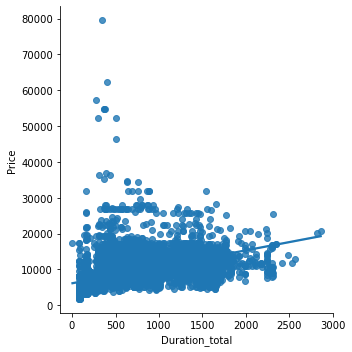

In [38]:
sns.lmplot(x="Duration_total", y="Price", data=data)
sns.set_style({'axes.edgecolor': 'white', 'axes.labelcolor': 'white','xtick.color': 'white', 'ytick.color': 'white'})
plt.show()

In general, the reg line tells us that, when the duration increases, the price increases too(except some exceptions..)

## The city having the most flights to ?
Let's get the unique destinations :

In [39]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat,Dur_H,Dur_M,Duration_total
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,early morning,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,morning,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,evening,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,noon,4,45,285


In [40]:
## Unique values :
data["Destination"].unique()
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Let's have a beautiful PieChart visualization :

In [41]:
fig = go.Figure(data=[go.Pie(labels=data["Destination"].value_counts().index,
                    values=data["Destination"].value_counts())])
 
# title alignment
fig.update_layout(title_text='Cities & DestinationFlights',title_y=0.85, title_x = 0.45)
 
fig.show()

A barplot maybe ?

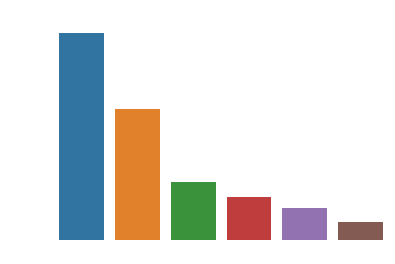

In [42]:
# create a barplot
sns.barplot(x=data["Destination"].value_counts().index, y=data["Destination"].value_counts(), data=data)
plt.title("Cities & DestinationFlights").set_color('white')
sns.set_style({'axes.edgecolor': 'white', 'axes.labelcolor': 'white','xtick.color': 'white', 'ytick.color': 'white'})
plt.show()

## What is the most occuring Airline company and what's her most used Route ?
To begin, let's find the most used Airline :

In [43]:
data["Airline"].value_counts().sort_values(ascending = False).index[0]

'Jet Airways'

So for this study, we will need only the rows where <strong> 'Jet Airways' </strong> occurs

In [44]:
data[data["Airline"] == 'Jet Airways'].groupby("Route")["Airline"].count().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
Name: Airline, dtype: int64

So the 10 most frequent Routes are :

In [45]:
data[data["Airline"] == 'Jet Airways'].groupby("Route")["Airline"].count().sort_values(ascending = False)[:10]

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
Name: Airline, dtype: int64

Let's check now if there is a relationship between Airline and flight Prices Distribution :
I think it is better to use the Boxplot in this case or known as 5 points summary (min, Q1, Med, Q3 and max) :

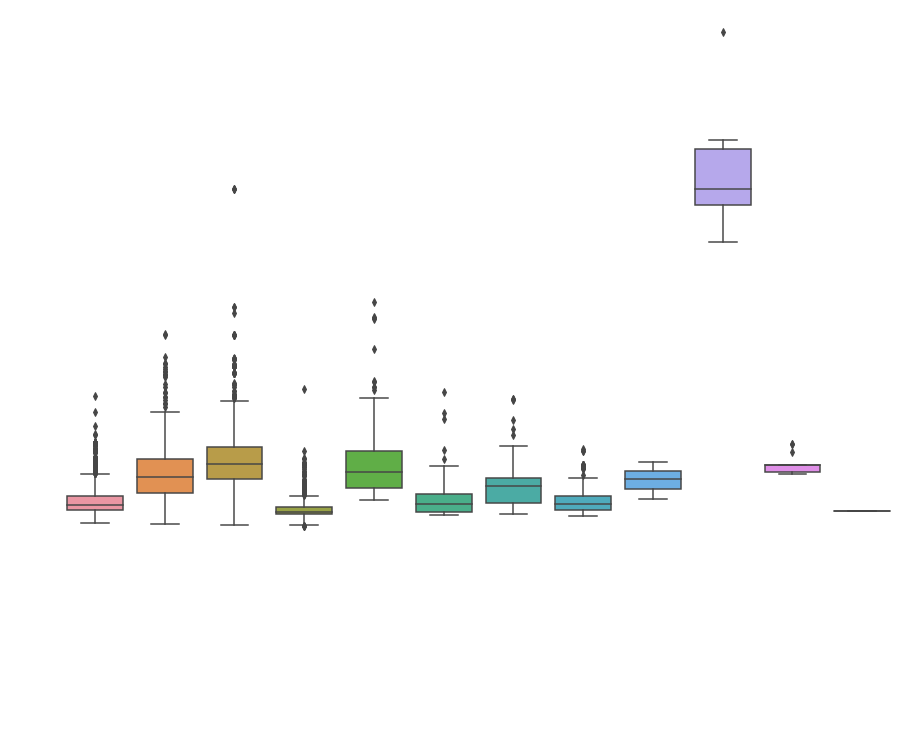

In [46]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "Airline", y = "Price", data = data)
plt.xticks(rotation = 90)
plt.show()

Easy to notice that "Jet Airways Business" have more expensive prices...
But we want also the Distrubition of the Prices for each Airline ==>we will use <strong> Violin Plot </strong>

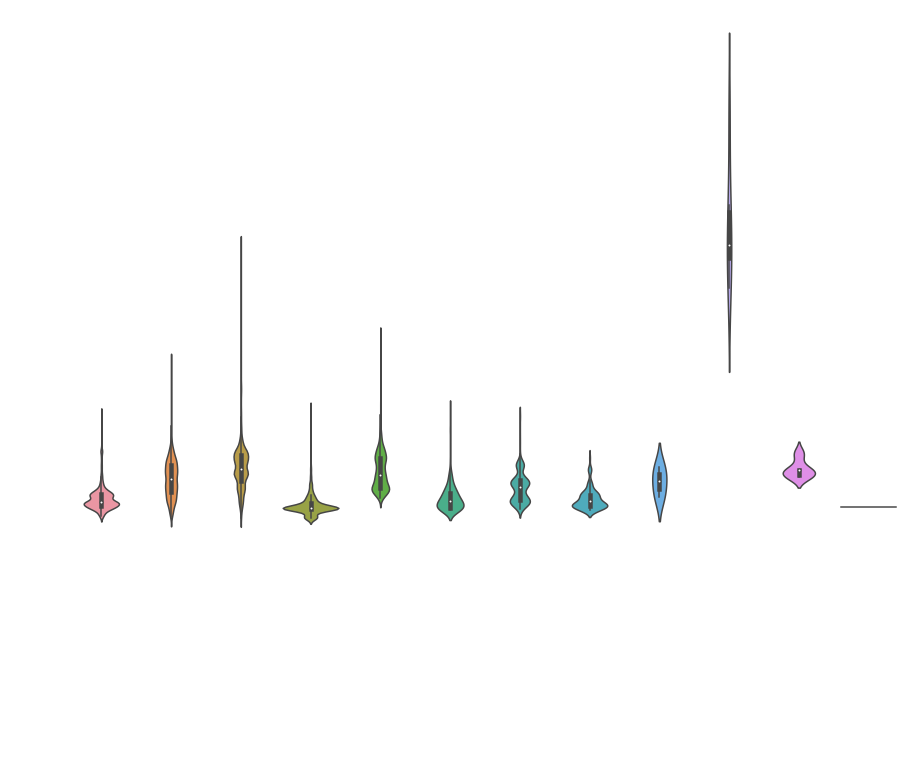

In [47]:
plt.figure(figsize = (15,10))
sns.violinplot(x = "Airline", y = "Price", data = data)
plt.xticks(rotation = 90)
plt.show()

After all these analysis, we can beggin deleting all the features that we are not going to use (in the meaning of unuseful for our study and modelisation) :

In [48]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_Cat', 'Dur_H', 'Dur_M',
       'Duration_total'],
      dtype='object')

In [49]:
# Deleting Route because it is extracted from Source, Destination and Total_Stops
# Deleting Duration_total because it is extracted from Dur_H and Dur_M
# Deleting Additional_Info because the majority of its values are "No info"
np.round(data["Additional_Info"].value_counts() / len(data) * 100, 2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [50]:
data.drop(columns = ["Route", "Duration_total", "Additional_Info"], axis =1, inplace = True)

## Feature encoding :
there are many features of object type, so we need to do some sort of encoding for these categorical variables :

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Duration             10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Price                10682 non-null  int64 
 6   Journey_Day          10682 non-null  int64 
 7   Journey_Month        10682 non-null  int64 
 8   Dep_Time_hour        10682 non-null  int64 
 9   Dep_Time_minute      10682 non-null  int64 
 10  Arrival_Time_hour    10682 non-null  int64 
 11  Arrival_Time_minute  10682 non-null  int64 
 12  Dep_Time_Cat         10642 non-null  object
 13  Dur_H                10682 non-null  int64 
 14  Dur_M                10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.2+ MB


let's specify our Categorical/Numerical features :
we will be using <strong> list comprehension </strong> :

In [52]:
Cat_Col = [col for col in data.columns if data[col].dtype == "object"]
Num_Col = [col for col in data.columns if data[col].dtype != "object"]

In [53]:
## Some Feature Encoding on "Source" Feature :
## if it is an Ordinal data ==> Using LabelEncoder
## But It is a nominal data (no hieararchy) ==> Using OneHotEncoding.
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [54]:
## To use OneHotEncoder we can import it from sklearn package or simply we can implement it !!
for category in data["Source"].unique():
    data["Source_"+category] = data["Source"].apply(lambda x: 1 if category == x else 0)

In [55]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat,Dur_H,Dur_M,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,night,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,early morning,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,morning,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,evening,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,noon,4,45,1,0,0,0,0


Taking the Airlines' names as a categorical variable is not a good idea so now we want to know the average of the flights' prices for each Airline, then, we will order these airlines as priorities in a dictionnary format :

In [56]:
## showing the mean price by airline :
data.groupby("Airline")["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [57]:
## Creating the priorities' dictionnary :
airlines = data.groupby("Airline")["Price"].mean().sort_values().index
dict1 = {key:index for index, key in enumerate(airlines, 0)}
## mapping the dictionnary on top the Airline feature :
data["Airline"] = data["Airline"].map(dict1)
## Results :
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat,Dur_H,Dur_M,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,night,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,early morning,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,morning,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,evening,5,25,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,noon,4,45,1,0,0,0,0


Now we will be dealing with <strong>"Destination"</strong> feature :

In [58]:
## let's check the unique values of our feature :
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

After some reaserches, we found that : New Delhi and Delhi are practically the same, the have the same Airport, so we will replace "New Delhi" by "Delhi":

In [59]:
data["Destination"].replace("New Delhi", "Delhi", inplace = True)
## checking :
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [60]:
## We will do also a priority hierarchy for this feature too :
Dest = data.groupby("Destination")["Price"].mean().sort_values().index
dict2 = {key:index for index, key in enumerate(Dest, 0)}
## mapping the dictionnary on top the Airline feature :
data["Destination"] = data["Destination"].map(dict2)
## Results :
data.head()


,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat,Dur_H,Dur_M,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,night,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,early morning,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,morning,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,evening,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,16,50,21,35,noon,4,45,1,0,0,0,0


Now we will be dealing with <strong>"Total_Stops"</strong> Feature :

In [61]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

we will create a simple dictionnary to replace these "object" values with "numerical" ones :

In [62]:
dict3 = {"non-stop" : 0, "1 stop" : 1, "2 stops" : 2, "3 stops" : 3, "4 stops" : 4}
data["Total_Stops"] = data["Total_Stops"].map(dict3)

In [63]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_Cat,Dur_H,Dur_M,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,night,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,early morning,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,morning,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,evening,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,noon,4,45,1,0,0,0,0


We have done all the possible <strong> Feature Encoding </strong>, and now we will delete all the categorical Features :

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  int64 
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  int64 
 3   Duration             10682 non-null  object
 4   Total_Stops          10682 non-null  int64 
 5   Price                10682 non-null  int64 
 6   Journey_Day          10682 non-null  int64 
 7   Journey_Month        10682 non-null  int64 
 8   Dep_Time_hour        10682 non-null  int64 
 9   Dep_Time_minute      10682 non-null  int64 
 10  Arrival_Time_hour    10682 non-null  int64 
 11  Arrival_Time_minute  10682 non-null  int64 
 12  Dep_Time_Cat         10642 non-null  object
 13  Dur_H                10682 non-null  int64 
 14  Dur_M                10682 non-null  int64 
 15  Source_Banglore      10682 non-null  int64 
 16  Sour

In [65]:
data.drop(columns = ["Source", "Duration", "Dep_Time_Cat"], axis =1, inplace = True)

## Detecting & Dealing with Outliers :
We will be first using many visualization tools in order to detect them :
- Distribution
- Histograms
- BoxPlot

Let's do it all at once :

In [66]:

def plots(df, col):
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
    
    sns.distplot(df[col], ax=ax1)
    sns.distplot(df[col], kde = False, ax=ax3)
    sns.boxplot(df[col], ax=ax2)
    ax1.set_title("Density of " + col, color="white")
    ax2.set_title("Boxplot of "+ col, color="white")
    ax3.set_title("Histogramme of " + col, color="white")
    plt.subplots_adjust(hspace=0.5)


C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



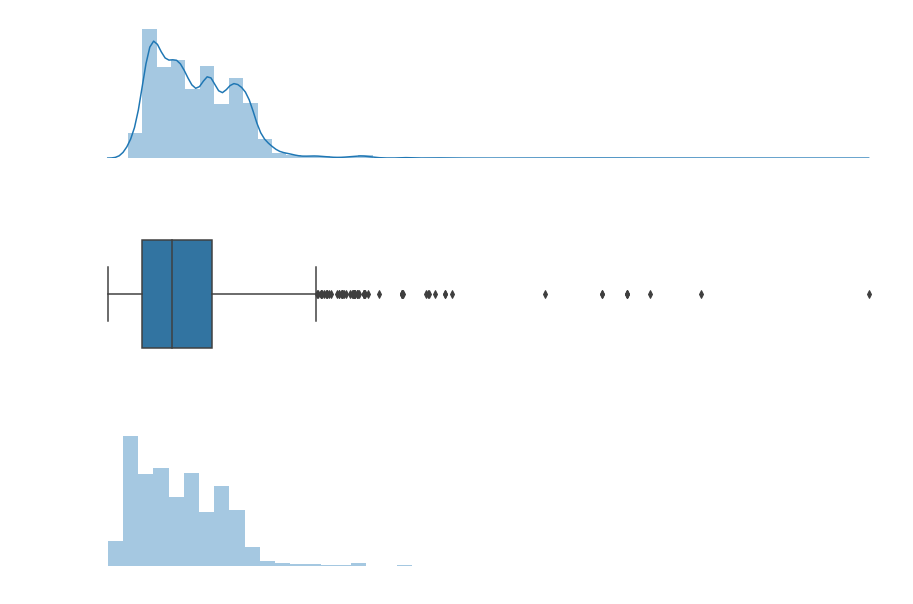

In [67]:
plots(data, "Price")


For detecting outliers, we have to define a <strong> threshold </strong>, as shown in each one of the graphs, we can detect many outliers... for example let's take this <strong> threshold = 35000 </strong> as the box plot indicates...
We have many approches to deal with these outliers :
- Med (Our chosen one ==> not affected by outliers).
- Mean ..

C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



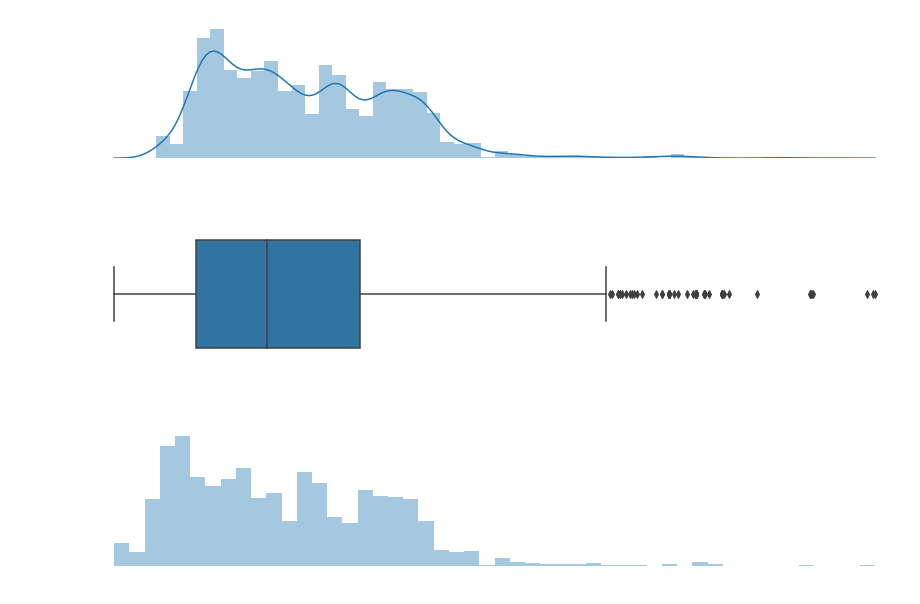

In [68]:
## We will use np.where(cond, what to do if 1, what to do if 0) :
data["Price"] = np.where(data["Price"] >= 35000, data["Price"].median(), data["Price"])
## Let's plot!!
plots(data, "Price")

## Feature Selection :

First of all, let's check the dtypes of our features :

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10682 non-null  int64  
 1   Destination          10682 non-null  int64  
 2   Total_Stops          10682 non-null  int64  
 3   Price                10682 non-null  float64
 4   Journey_Day          10682 non-null  int64  
 5   Journey_Month        10682 non-null  int64  
 6   Dep_Time_hour        10682 non-null  int64  
 7   Dep_Time_minute      10682 non-null  int64  
 8   Arrival_Time_hour    10682 non-null  int64  
 9   Arrival_Time_minute  10682 non-null  int64  
 10  Dur_H                10682 non-null  int64  
 11  Dur_M                10682 non-null  int64  
 12  Source_Banglore      10682 non-null  int64  
 13  Source_Kolkata       10682 non-null  int64  
 14  Source_Delhi         10682 non-null  int64  
 15  Source_Chennai       10682 non-null 

All numerical,no missing values, no incoherent dtypes... awesome!!!

Let's try to find the features that have most influence on our target variable :

In [70]:
from sklearn.feature_selection import mutual_info_regression

In [71]:
## Let's first store all our independent Features in a matrix "X", and the dependent one will be in "y":
X = data.drop(["Price"], axis = 1)
y = data["Price"]
## mutual_info_regression returns a score for each feature : the score measures the dependency bewtween Price and each feature 
## for a better view :
importance = pd.DataFrame(mutual_info_regression(X, y), index = X.columns)
importance.columns = ["Importance"]
importance["Importance"].sort_values(ascending = False)

Destination            1.000578
Airline                0.979596
Total_Stops            0.786532
Source_Delhi           0.525643
Dur_H                  0.475475
Source_Kolkata         0.459367
Arrival_Time_hour      0.400634
Source_Banglore        0.390442
Arrival_Time_minute    0.343316
Dur_M                  0.342617
Dep_Time_hour          0.334868
Dep_Time_minute        0.259599
Journey_Month          0.231293
Source_Mumbai          0.201639
Journey_Day            0.186151
Source_Chennai         0.135758
Name: Importance, dtype: float64

Let's go now for some <strong> ML !! </strong>
## Building & Saving our first model
first we will create our model from sklearn subpackages(LinearRegression, ensemble...) then we will try to optimize them (Hyperparameter Tuning) :



In [72]:
## Let's first split our data : 0.25 for the test set size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

As an example of algos to use: <strong> Random Forest </strong> :

we are going to use just as an example to show how to save and load your model :

In [73]:
## we are trying to predict flights' prices so it's a regression case :
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor()
## fitting 
model = rf.fit(X_train, y_train)

In [75]:
## predicting using model :
y_pred = model.predict(X_test)

In [76]:
## for a future usage with new data, let's save our model (using pickle or joblib...)
import pickle
## creating the file in the specified path :
file = open("rf_random.pkl", "wb")
## dumping the model' coeffs into the file :
pickle.dump(model, file)

In [77]:
## loading the model :
model = open("rf_random.pkl", "rb")
forest = pickle.load(model)

In [78]:
forest.predict(X_test)

array([16697.97,  6301.32,  8812.2 , ...,  3494.31,  6366.03,  7034.24])

In [79]:
y_pred

array([16697.97,  6301.32,  8812.2 , ...,  3494.31,  6366.03,  7034.24])

We can see that these values are the same!!

Let's define our <strong> own metric of evaluation </strong> :
MAPE : Mean Absolute Percentage Error, where :
- Error = y_true - y_pred
- Absolute for np.abs(Error)
- Percentage for Absolute / y_true * 100
- Mean for np.mean(Percentage) 

In [80]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

In [82]:
## Our Mean Absolute Percentage Error is :
mape(y_test, y_pred)

13.24285916041688

## Automating all the ML pipeline :
Defining a function that accepts as argument "ML model" and returns :
- The predictions
- Some scores of evvaluation
- Error Distrubition

In [86]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print("Training score : {} ".format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print("Predictions are : {}".format(y_prediction))
    print("\n")
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test, y_prediction)
    print("r2_score : {}".format(r2_score))
    print("MSE : {}".format(metrics.mean_squared_error(y_test, y_prediction)))
    print("MAE : {}".format(metrics.mean_absolute_error(y_test, y_prediction)))
    print("RMSE : {}".format(metrics.mean_squared_error(y_test, y_prediction) ** 0.5))
    print("MAPE : {}".format(mape(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)

Let's try our automation!!

## Using RandomForest :

Training score : 0.9520466869350681 
Predictions are : [16769.23  6199.03  8923.69 ...  3516.62  6300.78  7179.04]


r2_score : 0.8079649434958419
MSE : 3738461.6017512055
MAE : 1185.1607067450834
RMSE : 1933.5101762729892
MAPE : 13.281404020966118


C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



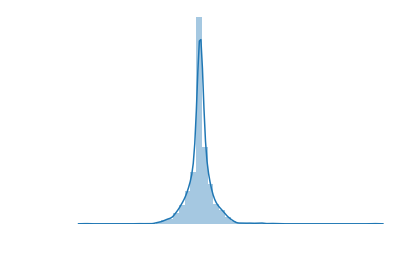

In [87]:
predict(RandomForestRegressor())

Looking at this plot, the error is <strong> concentrated at "0" </strong>, which indicates that our model is performing well !!

## Using XGBoost :

Training score : 0.932290483199956 
Predictions are : [16536.93    6922.178   8188.4355 ...  3731.7722  7943.6167  7039.208 ]


r2_score : 0.825480710422298
MSE : 3397471.663393978
MAE : 1185.0382544411475
RMSE : 1843.2231724330013
MAPE : 13.470781061223198


C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



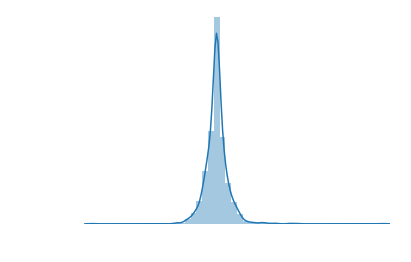

In [91]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()
predict(xgb_reg)

## HyperTuning ML models:
Our by default values of the hyperparameters of a ML model are not necessarily the values that are going to give us the best accuracy' scores, so let's play on these values!!

## RF model :

In [117]:
## We will be using RandomizedSearchCV in stead of GridSearchCV to make calculations easier :
from sklearn.model_selection import RandomizedSearchCV

In [118]:
## Initiating the model
rf = RandomForestRegressor()
## Defining the hyperparameters :
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_features': ['auto', 'sqrt',"log2"],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=42)

In [119]:
## Returning the best parameters and score :
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Best score:  0.8223035721973734


In [122]:
## Our best estimator is :
best_rf = random_search.best_estimator_

Training score : 0.905899497289943 
Predictions are : [16541.33261468  6211.35774176  8608.11474692 ...  3709.8032936
  7251.87230681  7089.64986185]


r2_score : 0.8210240897430044
MSE : 3484231.370639141
MAE : 1155.5217969126654
RMSE : 1866.609592453425
MAPE : 12.88358328573902


C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



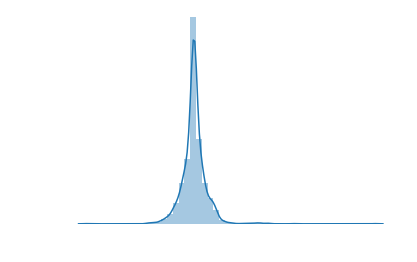

In [121]:
## Using the best model to predict :
predict(best_rf)

We succeded to increase our r2_score from 0.80... to 0.82... and decreasing all the error' values.

## XGBoost model :

In [126]:
## Initiating the model :
xgb_reg = xgb.XGBRegressor()
## Defining the parameters to use :
param_distributions = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
    'learning_rate': [0.001, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_distributions, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [127]:
## Returning the best parameters and score :
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'subsample': 0.9, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.02, 'gamma': 0.2, 'colsample_bytree': 0.5}
Best score:  0.8338861562200519


In [128]:
## Our best estimator is :
best_xgb = random_search.best_estimator_

Training score : 0.9182036300555422 
Predictions are : [16987.389   7072.431   8390.947  ...  3710.3467  7900.428   7038.262 ]


r2_score : 0.8347214772849557
MSE : 3217576.1135101845
MAE : 1164.8494379464182
RMSE : 1793.7603277779851
MAPE : 13.143108313575862


C:\Users\Computer House\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



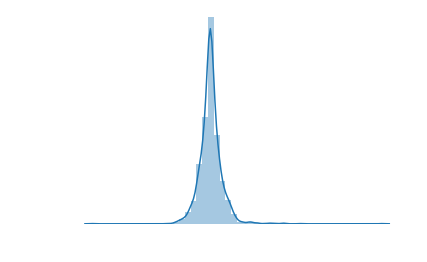

In [129]:
## Using the best model to predict :
predict(best_xgb)

We succeded to increase our r2_score from 0.825... to 0.834... and decreasing all the error' values.